In [ ]:
import pandas as pd
import tqdm
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20.7,8.27)})

In [2]:
df=pd.read_csv('db_references.csv')
df.head()

,article_id,references
0,53e99784b7602d9701f3e151,53e99cf5b7602d97025ace63
1,53e99784b7602d9701f3e151,557e8a7a6fee0fe990caa63d
2,53e99784b7602d9701f3e151,53e9a96cb7602d97032c459a
3,53e99784b7602d9701f3e151,53e9b929b7602d9704515791
4,53e99784b7602d9701f3e151,557e59ebf6678c77ea222447


In [3]:
article=pd.read_csv('main_table.csv')
article=article[['_id']]
article.rename(columns={"_id": "article_id"}, inplace=True)
article=article.join(df.set_index('article_id'), on='article_id', how='left')

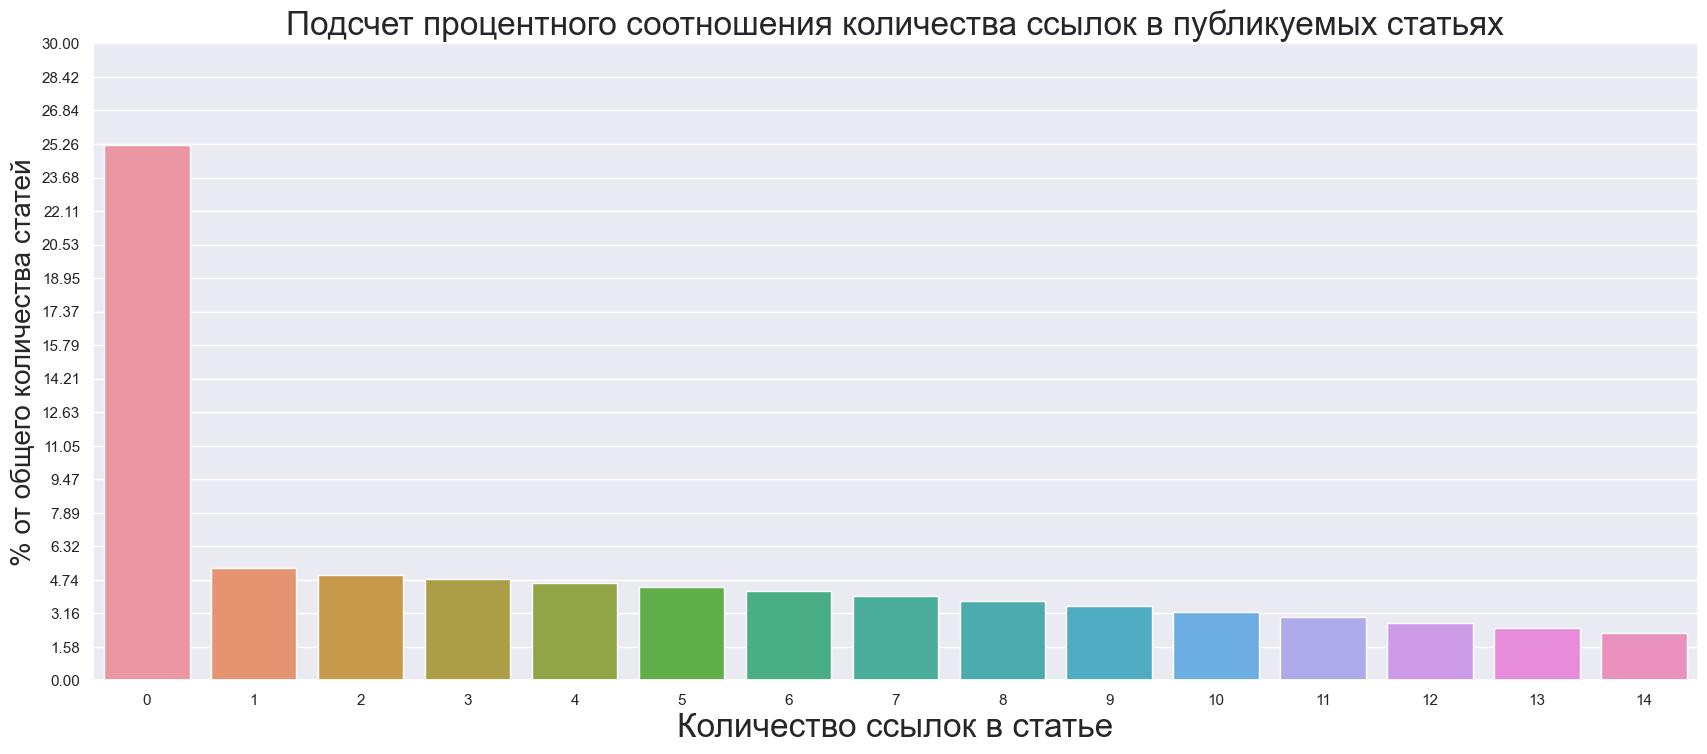

In [4]:
percent_articles_published_ref=article.groupby('article_id').count().value_counts(normalize=True)

x = []
y = []

for cur_ind in percent_articles_published_ref.index.tolist():
    x.append(cur_ind[0])

for idx in range(len(percent_articles_published_ref)):
    y.append(percent_articles_published_ref.iloc[idx] * 100)

d = {'Количество ссылок в статье':x[:15],
    "% от общего количества статей":y[:15]}

barplot_ = sns.barplot(x="Количество ссылок в статье", y="% от общего количества статей", data=pd.DataFrame(data=d))
barplot_.set_title('Подсчет процентного соотношения количества ссылок в публикуемых статьях', fontsize=24)
barplot_.set_xlabel("Количество ссылок в статье",fontsize=24)
barplot_.set_ylabel("% от общего количества статей",fontsize=20)
barplot_.set_yticks(np.linspace(0, 30, num=20))
plt.show()

посмотрим на тыжесть хвостов этого распределения

<AxesSubplot: ylabel='Frequency'>

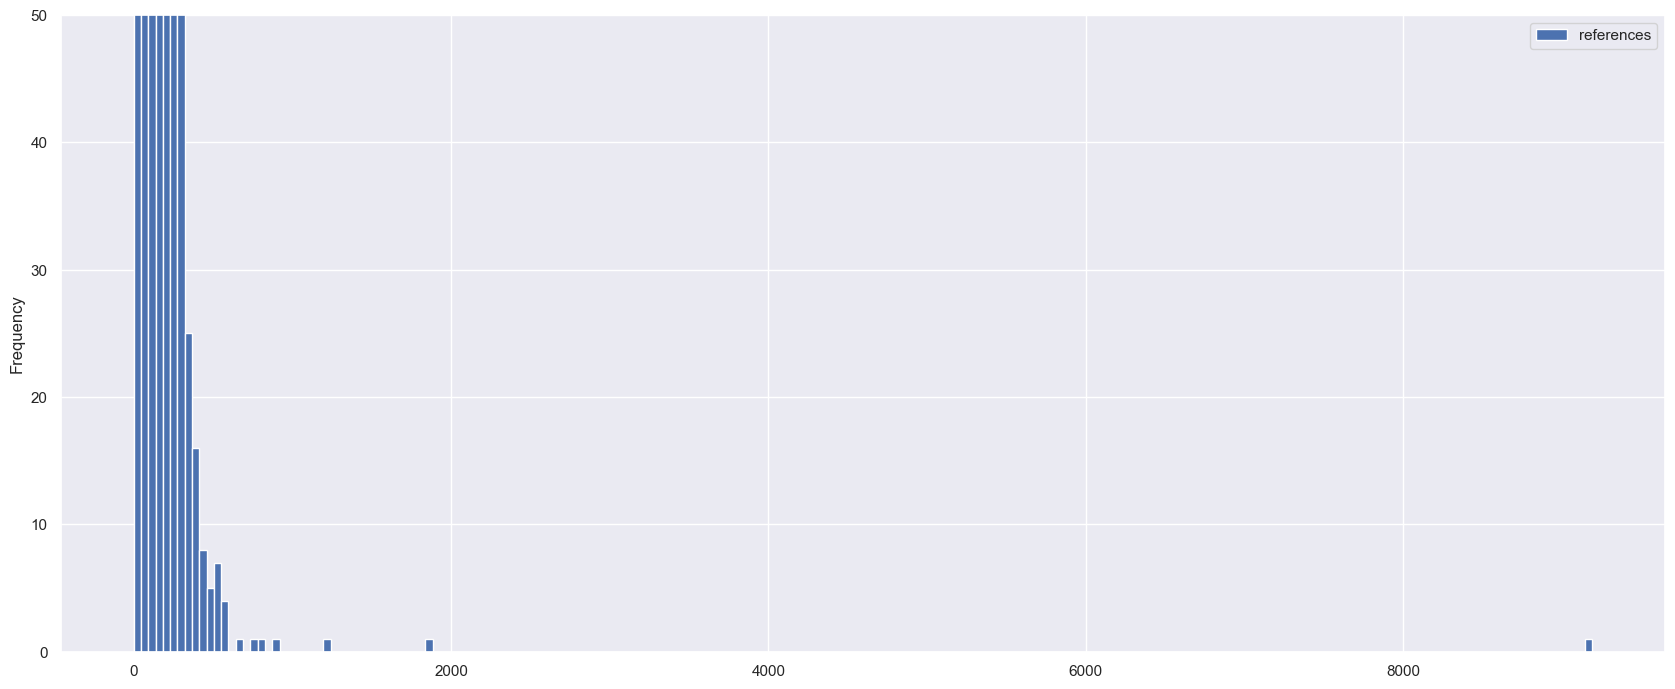

In [32]:
cnt_art=article.groupby('article_id').count()
cnt_art.plot.hist(bins=200, ylim=(0,50))

# обратные ссылки

In [33]:
article_ref=pd.read_csv('main_table.csv')
article_ref=article_ref[['_id', 'n_citation']]
article_ref.rename(columns={"_id": "references"}, inplace=True)
article_ref=article_ref.join(df.set_index('references'), on='references', how='left')

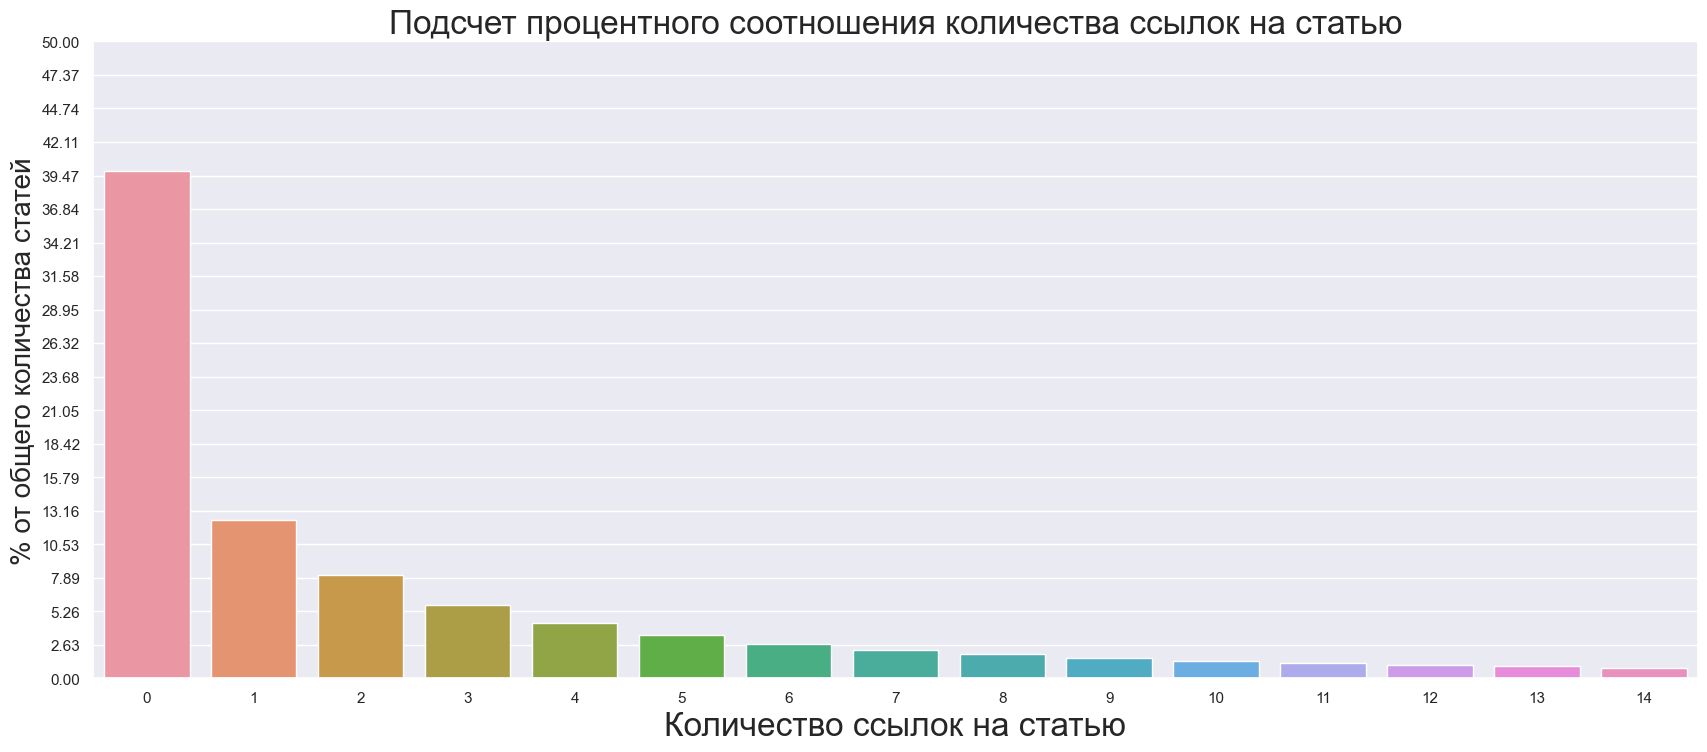

In [16]:
percent_income_ref=article_ref.groupby('references').count().value_counts(normalize=True)

x = []
y = []

for cur_ind in percent_income_ref.index.tolist():
    x.append(cur_ind[0])

for idx in range(len(percent_income_ref)):
    y.append(percent_income_ref.iloc[idx] * 100)

d = {'Количество ссылок на статью':x[:15],
    "% от общего количества статей":y[:15]}

barplot_ = sns.barplot(x="Количество ссылок на статью", y="% от общего количества статей", data=pd.DataFrame(data=d))
barplot_.set_title('Подсчет процентного соотношения количества ссылок на статью', fontsize=24)
barplot_.set_xlabel("Количество ссылок на статью",fontsize=24)
barplot_.set_ylabel("% от общего количества статей",fontsize=20)
barplot_.set_yticks(np.linspace(0, 50, num=20))
plt.show()

<AxesSubplot: ylabel='Frequency'>

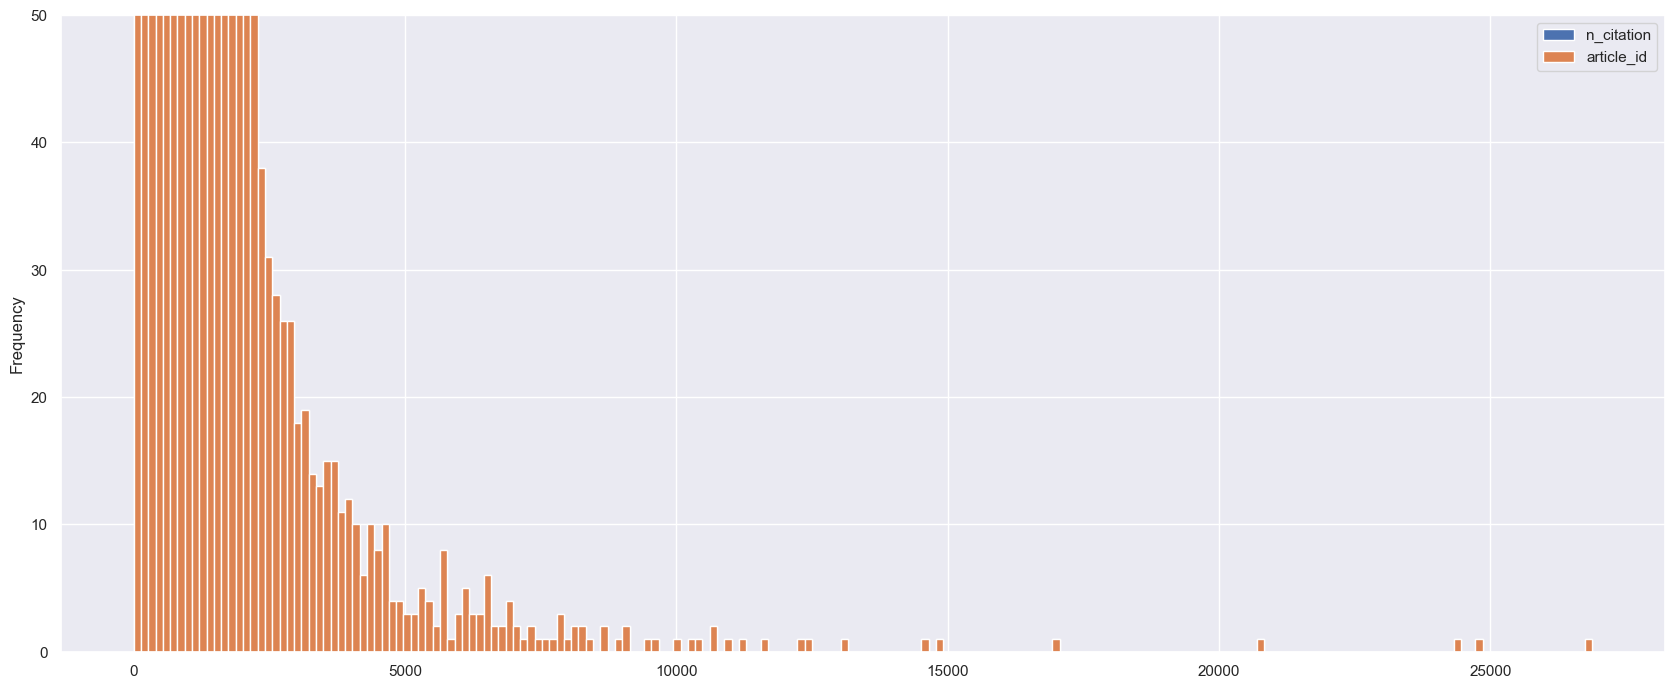

In [34]:
cnt_art=article_ref.groupby('references').count()
cnt_art.plot.hist(bins=200, ylim=(0,50))

Отдельно посчитаем количество ссылок на статью, которые исходят из нашей базы (популярность внутри базы)

In [34]:
percent_income_ref=article_ref.groupby(['references', 'n_citation'], as_index=False).count()

In [35]:
percent_income_ref

,,article_id
references,n_citation,
53a7258520f7420be8b514a9,647.0,0
53a7280320f7420be8ba5e96,41.0,0
53a7290120f7420be8bc149e,605.0,2
53a7293220f7420be8bcb112,0.0,0
53a72a9220f7420be8c0619c,356.0,0
...,...,...
607533659e795e95b026733c,1.0,0
6076ba9c9e795e3cffa24d0f,0.0,0
6077f2fd9e795eb6281c01ee,0.0,0


т.к. это число не совпадает с цитированием n_citation сохраним его отдельно и посмотрим какой из параметров 
ффективнее